In [47]:
import pandas as pd
import geopandas as gpd
import requests
import geojson
from tqdm.notebook import tqdm
from shapely.geometry import shape, MultiPolygon, Point, Polygon
import sys
sys.path.append('../src/')
from utils import save_pickle, load_pickle

#mapbox key for isochrones
token = 'pk.eyJ1IjoiZXZnZW5paWdhdnJpbGluIiwiYSI6ImNrMG50N3ptdjAzNW8zbm8wZzVmaXpzcWoifQ.LMSJohnSoBN-6YlAgKPO0w'


In [24]:
def get_isochrone(coord, kind = 'driving', minutes = '5,10,15,20'):
    """
    
    """
    request = f'https://api.mapbox.com/isochrone/v1/mapbox/{kind}/{coord.y},{coord.x}?contours_minutes={minutes}&polygons=true&access_token={token}'
    print(request)
    r = requests.get(request)  
    return geojson.loads(r.content)


In [11]:
df_home_job = pd.read_csv("../data/raw/01_CLocation_July.csv")
shape = gpd.read_file("../data/raw/fishnet2021/fishnet2021.shp")
df_home_job.rename(columns={'zid': 'cell_zid'}, inplace=True)

df_home_job = pd.merge(df_home_job, shape, on = ['cell_zid'])

# это только для отрисовки
# df_home_job['geometry'] = df_home_job['geometry'].astype(str)


In [12]:
df_home_job['center'] = df_home_job['geometry'].map(lambda poly: poly.centroid)

In [15]:
df = df_home_job.head()

In [32]:
df

,cell_zid,customers_cnt_home,customers_cnt_job,customers_cnt_day,customers_cnt_move,geometry,center
0,32909,4,0,0,0,"POLYGON ((37.03351 55.14029, 37.03346 55.14478...",POINT (37.03740694989381 55.1425474465426)
1,32910,25,8,26,0,"POLYGON ((37.04135 55.14032, 37.04130 55.14481...",POINT (37.0452488350607 55.14257695359622)
2,33261,2,0,2,0,"POLYGON ((37.02562 55.14475, 37.02556 55.14924...",POINT (37.02951223685058 55.14700918795363)
3,33262,13,2,11,0,"POLYGON ((37.03346 55.14478, 37.03341 55.14927...",POINT (37.03735498836724 55.14703920431827)
4,33263,10,0,3,0,"POLYGON ((37.04130 55.14481, 37.04125 55.14930...",POINT (37.04519775415532 55.14706871627504)


In [34]:
isochrones_walk = {}
for idx, row in tqdm(df.iterrows(), total=len(df)):
    isochrones_walk[row['cell_zid']] = get_isochrone(row['center'])
    if idx %2 == 0:
        save_pickle(isochrones_walk, "../data/precessed/isochrones_walk.pkl")
        

https://api.mapbox.com/isochrone/v1/mapbox/driving/55.1425474465426,37.03740694989381?contours_minutes=5,10,15,20&polygons=true&access_token=pk.eyJ1IjoiZXZnZW5paWdhdnJpbGluIiwiYSI6ImNrMG50N3ptdjAzNW8zbm8wZzVmaXpzcWoifQ.LMSJohnSoBN-6YlAgKPO0w
https://api.mapbox.com/isochrone/v1/mapbox/driving/55.14257695359622,37.045248835060704?contours_minutes=5,10,15,20&polygons=true&access_token=pk.eyJ1IjoiZXZnZW5paWdhdnJpbGluIiwiYSI6ImNrMG50N3ptdjAzNW8zbm8wZzVmaXpzcWoifQ.LMSJohnSoBN-6YlAgKPO0w
https://api.mapbox.com/isochrone/v1/mapbox/driving/55.14700918795363,37.02951223685058?contours_minutes=5,10,15,20&polygons=true&access_token=pk.eyJ1IjoiZXZnZW5paWdhdnJpbGluIiwiYSI6ImNrMG50N3ptdjAzNW8zbm8wZzVmaXpzcWoifQ.LMSJohnSoBN-6YlAgKPO0w
https://api.mapbox.com/isochrone/v1/mapbox/driving/55.14703920431827,37.03735498836724?contours_minutes=5,10,15,20&polygons=true&access_token=pk.eyJ1IjoiZXZnZW5paWdhdnJpbGluIiwiYSI6ImNrMG50N3ptdjAzNW8zbm8wZzVmaXpzcWoifQ.LMSJohnSoBN-6YlAgKPO0w
https://api.mapbox.com/isoch

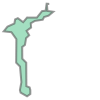

In [49]:
Polygon(isochrones_walk[32909]['features'][3]['geometry']['coordinates'][0])